### Reduce overfitting: Regularization

Regularization is a technique to shrink the coefficient parameters toward zero by adding additional term method for automatically penalizing extra features

L1 and L2 regularization term against model complexity

<img src='reg.png'>

### L1 Regularization
- adds a penality equal to the sum of the absolute value of the weights
- L1 can yield sparse features vectors (i.e. more feature weight will be zero)
- this L1 can be useful in practical if we have high-dimensional dataset with many features that irrelevant
- Some coefficients can be zero
- Lasso Regression uses this method

### L2 Regularization
- the sum of the squares of the weights
- L2 uses non-sparse co-efficients, so does not have built-in feature selection property.
- Ridge regression and SVMs uses this method

In [ ]:
# # # m*x+c
# m1 = -10
# m2 = -2
# m3 = 1

# alpha = 0.5
# mse = ((y-prediction)**2)/N = 0
# L1 = 0 +  alpha(10+2+1) = 13 = 6.5
# L2 = 0 + alpha(100+4+1) = 105 = 52.5

### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([0,1,2,3,4,5])
y = np.array([0,0.8,0.9,0.1,-0.8, -1])

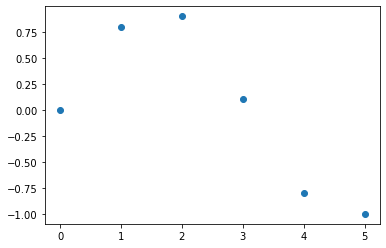

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
from sklearn.linear_model import Ridge, Lasso

In [10]:
10*0.00000001

1e-07

In [5]:

def ridge_reg(deg):
    p = PolynomialFeatures(degree=deg)
    new_x  = p.fit_transform(x.reshape(-1,1))
    
    rg = Ridge(alpha=10)
    pred = rg.fit(new_x, y).predict(new_x)
    plt.scatter(x,y)
    plt.plot(x,pred)
    plt.show()

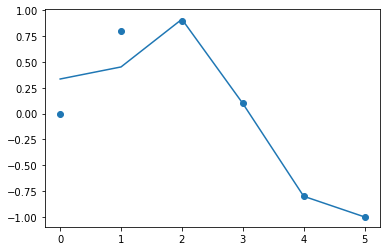

In [8]:
ridge_reg(10)
# if alpha is largest: it leads to a underfitting problem
# if alpha is smallest: it leads to overfitting problem

### Let's try alpha's digfferent values

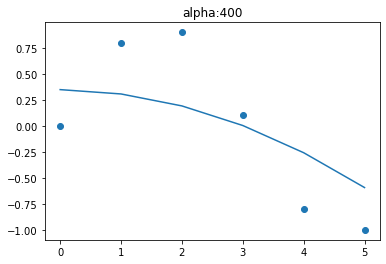

In [14]:
a = [.0001, .001, .01,.1,1,10,101,400]
from IPython.display import clear_output
for i in a:
    p = PolynomialFeatures(degree=2)
    new_x  = p.fit_transform(x.reshape(-1,1))
    
    lg = Ridge(alpha=i)
    pred = lg.fit(new_x, y).predict(new_x)
    plt.scatter(x,y)
    plt.title('alpha:{}'.format(i))
    plt.plot(x,pred)
    plt.show()
    plt.pause(0.1)
    clear_output(wait=True)

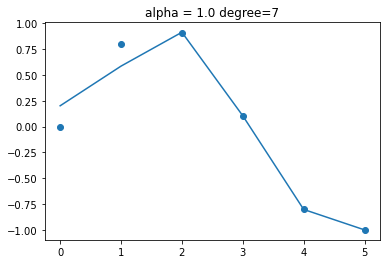

In [15]:
from IPython.display import clear_output

a = np.linspace(0,1,50)
for d in [2,3,4,5,6,7]:
    for i in a:
        p = PolynomialFeatures(d)
        new_x = p.fit_transform(x.reshape(-1,1))
        
        rid = Ridge(alpha=i)
        rid.fit(new_x, y)
        pred = rid.predict(new_x)
        
        # Plot 
        s = "alpha = {} degree={}".format(round(i,3), d)
        plt.title(s)
        plt.scatter(x,y)
        ln = plt.plot(x,pred)
        plt.pause(.1)
        ln[0].remove()
        clear_output(wait=True)